# FFNN

Dataset : https://github.com/eifuentes/lastfm-dataset-1K

In [1]:
#!pip install d2l==1.0.0a1.post0

In [2]:
%matplotlib inline
import csv
import glob
import re
import numpy as np
import scipy.io
import scipy.signal
import matplotlib.pyplot as plt
import torch
from d2l import torch as d2l

import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


#!pip install fastparquet

## Dataset

In [3]:
df = pd.read_parquet('..\lastfm-dataset-1k.snappy.parquet')

In [4]:
df = df.dropna()

In [5]:
print(f'Number of Records: {len(df):,}\nUnique Users: {df.user_id.nunique()}\nUnique Artist:{df.artist_id.nunique():,}')
df.head()

Number of Records: 16,936,134
Unique Users: 992
Unique Artist:83,905


,user_id,timestamp,artist_id,artist_name,track_id,track_name
0,user_000001,2006-08-13 13:59:20+00:00,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,c4633ab1-e715-477f-8685-afa5f2058e42,The Launching Of Big Face
1,user_000001,2006-08-13 14:03:29+00:00,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,bc2765af-208c-44c5-b3b0-cf597a646660,Zn Zero
2,user_000001,2006-08-13 14:10:43+00:00,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,aa9c5a80-5cbe-42aa-a966-eb3cfa37d832,The Return Of Super Barrio - End Credits
3,user_000001,2006-08-13 14:17:40+00:00,67fb65b5-6589-47f0-9371-8a40eb268dfb,Tommy Guerrero,d9b1c1da-7e47-4f97-a135-77260f2f559d,Mission Flats
4,user_000001,2006-08-13 14:19:06+00:00,1cfbc7d1-299c-46e6-ba4c-1facb84ba435,Artful Dodger,120bb01c-03e4-465f-94a0-dce5e9fac711,What You Gonna Do?
5,user_000001,2006-08-13 14:23:03+00:00,6b77d8ef-c405-4846-9d5f-2b93e6533101,Rei Harakami,777ac51f-8ffc-4c44-92b6-a2c75cbc6915,Joy
6,user_000001,2006-08-13 14:44:23+00:00,6b77d8ef-c405-4846-9d5f-2b93e6533101,Rei Harakami,328913b8-f31f-4abf-976e-7641174f680b,Lust
7,user_000001,2006-08-13 14:55:14+00:00,27613b78-1b9d-4ec3-9db5-fa0743465fdd,Herbie Hancock,8e81302a-6cde-4818-8703-43b5356ce0a0,The Essence
8,user_000001,2006-08-13 14:59:59+00:00,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,1c0377bb-c00b-4bbe-b4b2-615f13324adc,Idioteque
9,user_000001,2006-08-13 15:05:20+00:00,477d1c52-3100-4493-a049-473d8f183e23,高木正勝,8f916d23-0510-4ad5-9a7f-8a076c3f14ca,Change Of Seasons


### Taking only a part of the users and a part of each users' track history

In [6]:
Number_of_users = 100
History_size = 500

userIds = []
trackIds = []

usersCounter = 0

for userId in df.user_id.unique():#[:Number_of_users]:


    userHistory = df[ (df["user_id"] == userId) ][:History_size]

    #print(userId, userHistory.count().track_id)
    if userHistory.count().track_id >= History_size:    #If user has less than 500 tracks
    
        range_i = userHistory.index.values.tolist()

        #print(range_i)

        for i in range_i:

            userIds.append(userHistory.user_id[i])
            trackIds.append(userHistory.track_id[i])
                
        print("User", userId)

        usersCounter+=1
    
    if usersCounter >= 100:     #Stop when we have 100 users
        break
    


df_light = pd.DataFrame(columns = ["user_id",    "track_id"])

rows = pd.DataFrame({ "user_id":userIds,   "track_id":trackIds })
df_light = pd.concat([df_light,rows],axis=0)

User user_000001
User user_000002
User user_000003
User user_000004
User user_000005
User user_000006
User user_000007
User user_000008
User user_000009
User user_000010
User user_000011
User user_000012
User user_000013
User user_000015
User user_000016
User user_000017
User user_000018
User user_000019
User user_000020
User user_000021
User user_000022
User user_000023
User user_000024
User user_000025
User user_000026
User user_000027
User user_000028
User user_000029
User user_000030
User user_000031
User user_000032
User user_000033
User user_000034
User user_000035
User user_000036
User user_000037
User user_000038
User user_000039
User user_000040
User user_000041
User user_000042
User user_000043
User user_000044
User user_000045
User user_000046
User user_000047
User user_000048
User user_000050
User user_000051
User user_000052
User user_000053
User user_000054
User user_000055
User user_000056
User user_000057
User user_000058
User user_000059
User user_000060
User user_0000

In [7]:
#### TRACKS ARRAY ####
#This array gives us the ID each track given the index in the array
track_indices = {}

i = 0
for trackId in df_light.track_id.unique():
    track_indices[trackId] = i
    i+=1

In [8]:
len(track_indices)

26350

### Formatting the data for training

In [9]:
class fmDataset(torch.utils.data.Dataset):

    def __init__(self, df_light, y_to_predict_split=0.2):
        super().__init__()
        self.y_to_predict_split = y_to_predict_split
        self.df_light = df_light
        self.x = torch.tensor(np.zeros((100, int(History_size - History_size*y_to_predict_split))), dtype=torch.float32)
        self.y = torch.tensor(np.zeros((100, int(History_size*y_to_predict_split))), dtype=torch.int64)

    def load_data(self):

        data_x = []   #data will be shape [users] -> [history items] -> [tracks]
        data_y = []

        userIndex = 0

        for userId in df_light.user_id.unique():
            
            user_history = self.df_light[ self.df_light["user_id"] == userId ]

            user_new_history_x = []
            user_new_history_y = []

            y_counter = 0

            for i in user_history.index.values.tolist():    #Go through user's history
                #user_history_item = np.zeros(len(track_indices))    #get list of all tracks with value 0 default

                #user_history_item[ track_indices[user_history.track_id[i]] ]    #put value 1 on the track in the current row in the user's history
                if y_counter < (History_size * self.y_to_predict_split):
                    user_new_history_y.append( track_indices[ user_history.track_id[i] ] )
                    #user_new_history_y.append(user_history_item)
                else:
                    user_new_history_x.append( track_indices[ user_history.track_id[i] ] )
                    #user_new_history_x.append(user_history_item)
                #user_new_history.append(user_history_item)
                
                y_counter+=1
            
            #data[userIndex] = torch.tensor(user_new_history, dtype=torch.float64)  #append user's history to data
            data_x.append(user_new_history_x)
            data_y.append(user_new_history_y)


        
        # convert to PyTorch tensors
        self.x = torch.tensor(data_x, dtype=torch.float32)
        self.y = torch.tensor(data_y, dtype=torch.float32)
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.x.shape[0]

In [10]:
data = fmDataset(df_light=df_light)
data.load_data()

In [11]:
x, y = data[0]
print("History size (input), tracks to predict (output): ", len(x), len(y))
print('Number of examples: %d' % len(data))
print(x, y)

History size (input), tracks to predict (output):  400 100
Number of examples: 100
tensor([ 95.,  96.,  97.,  95.,  96.,  97.,  95.,  96.,  97.,  98.,  99., 100.,
        101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112.,
        113., 114., 115., 116., 117., 118., 119., 120., 121., 122., 123., 124.,
        125., 126., 127., 125., 126., 127., 128., 125., 126., 127., 125., 125.,
        125., 126., 125., 126., 127., 125., 126., 127., 128., 125., 126., 127.,
        125., 126., 127., 125., 126., 127., 128., 125., 126., 127., 125., 126.,
        127., 128., 125., 126., 127., 128., 125., 126., 127., 125., 125., 126.,
        125., 126., 125., 125., 126., 127., 125., 126., 125., 126., 127., 129.,
        130., 131., 132., 133., 134., 135., 110., 111., 112., 113., 114., 136.,
        124., 137., 138., 139., 140., 141., 142.,  39.,  32.,  34.,  31.,  33.,
         28.,  36.,  30., 143., 144., 145., 146., 116., 118., 119., 147., 148.,
        149., 150., 151., 152., 153.,

### Splitting training and test sets

We will split our dataset in separate training and test sets (80% &ndash; 20%).

In [12]:
train_samples = int(0.8 * len(data))
test_samples = len(data) - train_samples
data_train, data_test = torch.utils.data.random_split(data, (train_samples, test_samples))

print('data_train:', len(data_train))
print('data_test: ', len(data_test))

data_train: 80
data_test:  20


## Training loop

In [13]:
def accuracy(y_hat, y):
    # Computes the mean accuracy.
    # y_hat: raw network output (before sigmoid or softmax)
    #        shape (samples, classes)
    # y:     shape (samples)

    # multi-class classification
    y_hat = torch.argmax(y_hat, axis=0).to(y.dtype)
    correct = (y_hat == y).to(torch.float32)
    return torch.mean(correct)

In [14]:
#print(len(data_train))
#for i, (x, y) in enumerate(data_train):
#    print(i, len(x), len(y))

80
0 400 100
1 400 100
2 400 100
3 400 100
4 400 100
5 400 100
6 400 100
7 400 100
8 400 100
9 400 100
10 400 100
11 400 100
12 400 100
13 400 100
14 400 100
15 400 100
16 400 100
17 400 100
18 400 100
19 400 100
20 400 100
21 400 100
22 400 100
23 400 100
24 400 100
25 400 100
26 400 100
27 400 100
28 400 100
29 400 100
30 400 100
31 400 100
32 400 100
33 400 100
34 400 100
35 400 100
36 400 100
37 400 100
38 400 100
39 400 100
40 400 100
41 400 100
42 400 100
43 400 100
44 400 100
45 400 100
46 400 100
47 400 100
48 400 100
49 400 100
50 400 100
51 400 100
52 400 100
53 400 100
54 400 100
55 400 100
56 400 100
57 400 100
58 400 100
59 400 100
60 400 100
61 400 100
62 400 100
63 400 100
64 400 100
65 400 100
66 400 100
67 400 100
68 400 100
69 400 100
70 400 100
71 400 100
72 400 100
73 400 100
74 400 100
75 400 100
76 400 100
77 400 100
78 400 100
79 400 100


In [15]:
def train(net, data_train, epochs=1, lr=0.01, device=d2l.try_gpu()):
    # Trains the model net with data from the data_loaders['train'] and data_loaders['val'].
    net = net.to(device)
    
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)

    animator = d2l.Animator(xlabel='epoch',
                            legend=['train loss', 'train acc', 'validation acc'],
                            figsize=(10, 5))

    #timer = {'train': d2l.Timer(), 'val': d2l.Timer()}

    for epoch in range(epochs):
        # monitor loss, accuracy, number of samples
        metrics = {'train': d2l.Accumulator(3), 'val': d2l.Accumulator(3)}


        for i, (x, y) in enumerate(data_train):

            # move to device
            x = x.to(device)
            y = y.to(device)

            # compute prediction
            y_hat = net(x)
            
            # compute cross-entropy loss
            loss = torch.nn.CrossEntropyLoss()(y_hat, y.to(torch.float32)[:100])

            # compute gradients and update weights
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            metrics['train'].add(loss * x.shape[0],
                                accuracy(y_hat, y) * x.shape[0],
                                x.shape[0])

            #timer.stop()

        animator.add(epoch + 1,
            (metrics['train'][0] / metrics['train'][2],
             metrics['train'][1] / metrics['train'][2]))
             #metrics['val'][1] / metrics['val'][2]))

    train_loss = metrics['train'][0] / metrics['train'][2]
    train_acc  = metrics['train'][1] / metrics['train'][2]
    #val_acc    = metrics['val'][1] / metrics['val'][2]
    #examples_per_sec = metrics['train'][2] * epochs / timer['train'].sum()
    
    print(f'train loss {train_loss:.3f}, train acc {train_acc:.3f}, ')
          #f'val acc {val_acc:.3f}')
    #print(f'{examples_per_sec:.1f} examples/sec '
    #      f'on {str(device)}')

### Neural Network using Pytorch

In [16]:
class NeuralNetwork(torch.nn.Module):
    # TODO make this identical to LSTMNet, but use torch.nn.LSTM
    #      instead of the LSTM layer you implemented yourself
    def __init__(self, inputs=400, outputs=100):
        super().__init__()

        self.net = torch.nn.Sequential(
            torch.nn.Linear(inputs, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 128),
            torch.nn.Softmax(),
            torch.nn.Linear(128, outputs)
        )
        
    def forward(self, x):

        output = self.net( x.to(torch.float32) )
        
        return output

net = NeuralNetwork()
#print(net)

## Training

In [ ]:
# A FAIRE : APPLIQUER LES CHANGEMENTS FAITS DANS LSTM ET CHANGER CE FFNN AVEC CE QUE J'AI COMPRIS

train loss 5476578.327, train acc 0.000, 


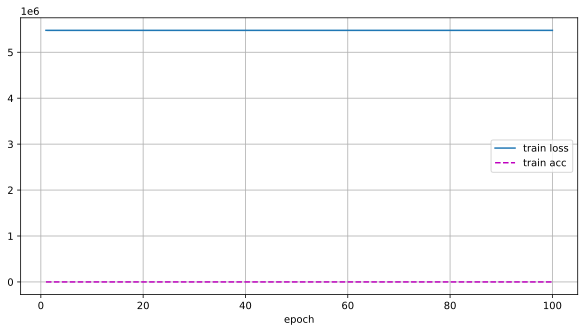

In [17]:
train(NeuralNetwork(), data_train, epochs=100, lr=0.01)